In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random as rd

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.cluster import KMeans
from sklearn.cluster import BisectingKMeans
from sklearn.model_selection import cross_val_score

from sklearn.utils import resample
plt.style.use('ggplot')





/Applications/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
file_path = '/Users/varalam/Downloads/Original Dataset without Outliers Normalized.csv'
df = pd.read_csv(file_path)
df.head(5)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_encoded,gender_encoded
0,1.713008,0,1,-0.286437,1.134061,0.126046,0,-0.633042,-0.841116
1,0.560337,0,0,0.072849,1.134061,-1.523079,0,-0.633042,-0.841116
2,-0.592335,0,0,0.072849,0.232946,0.620784,0,-0.633042,1.188683
3,-0.237667,0,0,-0.579938,-0.467921,0.538328,0,1.579675,-0.841116
4,1.535674,1,1,-1.138266,-0.668169,0.538328,0,1.579675,1.188683


<h1>SMOTE Oversampling</h1>

In [3]:
is_diabetic = df["diabetes"].value_counts()
print("Yes: ",is_diabetic[1])
print("No: ",is_diabetic[0])

Yes:  5736
No:  90572


In [4]:
#Copy of df before doing SMOTE oversampling
new_df = df.copy()

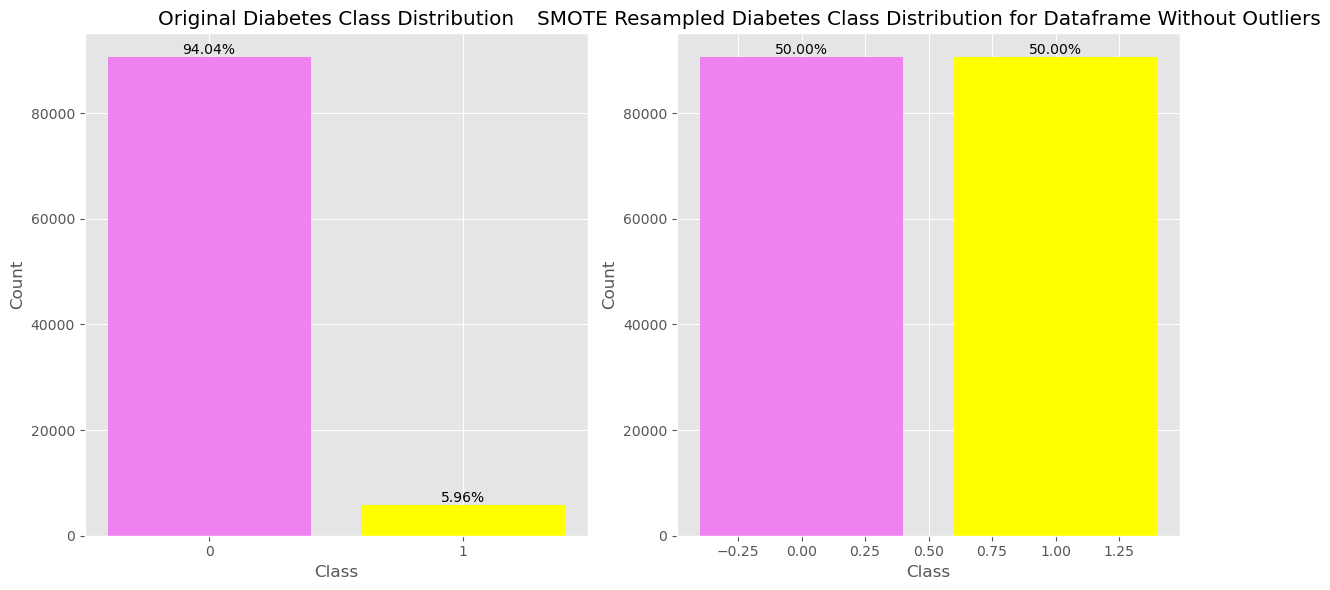

In [5]:
from imblearn.over_sampling import SMOTE

# Separate features (X) and target variable (y)
X = new_df.drop("diabetes", axis=1)
y = new_df["diabetes"]

# Initialize SMOTE

smote = SMOTE(random_state=424)

# Apply SMOTE to the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Count the occurrences of each class in the original dataset
original_class_counts = new_df["diabetes"].value_counts()

# Calculate the percentage of each class
original_percentages = original_class_counts / len(new_df) * 100

# Count the occurrences of each class in the resampled dataset
resampled_class_counts = pd.Series(y_resampled).value_counts()

# Calculate the percentage of each class
resampled_percentages = resampled_class_counts / len(y_resampled) * 100

# Plotting
plt.figure(figsize=(12, 6))

# Bar chart for original and SMOTE resampled class distribution
plt.subplot(1, 2, 1)
bars_1 = plt.bar(original_class_counts.index, original_class_counts.values, color=['violet', 'yellow'])
for bar, label in zip(bars_1, original_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('Original Diabetes Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(original_class_counts.index, ['0', '1'])

plt.subplot(1, 2, 2)
bars_2 = plt.bar(resampled_class_counts.index, resampled_class_counts.values, color=['violet', 'yellow'])
for bar, label in zip(bars_2, resampled_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('SMOTE Resampled Diabetes Class Distribution for Dataframe Without Outliers')
plt.xlabel('Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [6]:
# Create a DataFrame from the SMOTE resampled data
df_resampled = pd.DataFrame(data=X_resampled, columns=X.columns)
df_resampled["diabetes"] = y_resampled

df_resampled_bisect = df_resampled.copy()
df_resampled_imp = df_resampled.copy()

<h1>KMeans Clustering<h1>

In [7]:
X = df_resampled.iloc[:, 0:8]
y = df_resampled.iloc[:, -1]

In [8]:
# Fit KMeans model
model=KMeans(n_clusters=4, n_init=10, random_state=424)
model.fit(X)

labels=model.labels_ + 1
labels  #clustering into 2 groups: 0 and 1

centers=model.cluster_centers_
centers

model.inertia_

X['clusters']=labels
X

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_encoded,gender_encoded,clusters
0,1.713008,0,1,-0.286437,1.134061,0.126046,-0.633042,-0.841116,4
1,0.560337,0,0,0.072849,1.134061,-1.523079,-0.633042,-0.841116,4
2,-0.592335,0,0,0.072849,0.232946,0.620784,-0.633042,1.188683,1
3,-0.237667,0,0,-0.579938,-0.467921,0.538328,1.579675,-0.841116,2
4,1.535674,1,1,-1.138266,-0.668169,0.538328,1.579675,1.188683,2
...,...,...,...,...,...,...,...,...,...
181139,1.702351,1,0,0.216381,1.154272,3.424297,1.579675,-0.841116,3
181140,-0.422583,0,0,2.054542,2.035177,0.462563,1.579675,-0.841116,2
181141,0.713162,1,0,0.029855,1.033937,2.324880,-0.633042,1.188683,3
181142,1.186506,0,0,1.989357,0.333070,2.874589,-0.633042,1.188683,3


<h1>Elbow Plot of KMeans Clustering<h1>

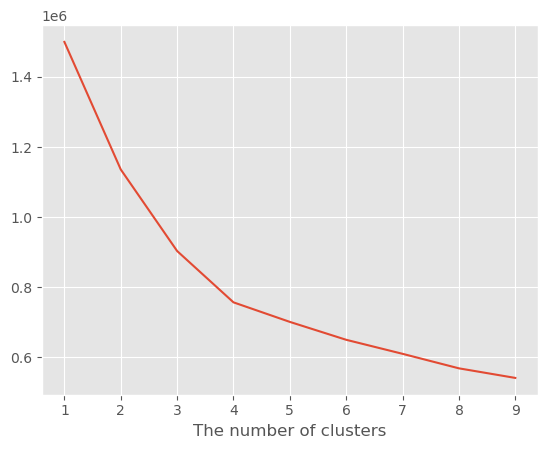

In [9]:
inertia_train={}
for n_cluster in range(1,10):
    model=KMeans(n_clusters=n_cluster, n_init=10)
    model.fit(X)
    inertia_train[n_cluster]=model.inertia_
    
plt.plot(range(1,10),inertia_train.values())
plt.xlabel('The number of clusters') #inertia is the measure of each dots to its centers: tight clusters, low inertia
plt.show()

In [10]:
# Assign the 'clusters' column to the original DataFrame
df_resampled['clusters'] = X['clusters']

# Display the DataFrame with added 'clusters' column
df_resampled

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_encoded,gender_encoded,diabetes,clusters
0,1.713008,0,1,-0.286437,1.134061,0.126046,-0.633042,-0.841116,0,4
1,0.560337,0,0,0.072849,1.134061,-1.523079,-0.633042,-0.841116,0,4
2,-0.592335,0,0,0.072849,0.232946,0.620784,-0.633042,1.188683,0,1
3,-0.237667,0,0,-0.579938,-0.467921,0.538328,1.579675,-0.841116,0,2
4,1.535674,1,1,-1.138266,-0.668169,0.538328,1.579675,1.188683,0,2
...,...,...,...,...,...,...,...,...,...,...
181139,1.702351,1,0,0.216381,1.154272,3.424297,1.579675,-0.841116,1,3
181140,-0.422583,0,0,2.054542,2.035177,0.462563,1.579675,-0.841116,1,2
181141,0.713162,1,0,0.029855,1.033937,2.324880,-0.633042,1.188683,1,3
181142,1.186506,0,0,1.989357,0.333070,2.874589,-0.633042,1.188683,1,3


In [11]:
# Iterate over unique cluster values
for cluster_value in df_resampled['clusters'].unique():
    # Create a DataFrame for the current cluster
    cluster_idx = df_resampled[df_resampled['clusters'] == cluster_value].copy()
    
    # Create a variable for the current DataFrame
    globals()[f'cluster_{cluster_value}'] = cluster_idx

In [12]:
X_cluster_1 = cluster_1.drop('diabetes', axis=1)  # Features
X_cluster_1 = X_cluster_1.drop('clusters', axis = 1)
y_cluster_1 = cluster_1['diabetes']  # Target variable


# Split the data into training and test sets
X_train_cluster_1, X_test_cluster_1, y_train_cluster_1, y_test_cluster_1 = train_test_split(X_cluster_1, y_cluster_1, test_size=0.3, random_state=414)

# Initialize the logistic regression model
logreg_1 = LogisticRegression(random_state=414)

# Fit the model on the training data
logreg_1.fit(X_train_cluster_1, y_train_cluster_1)

# Make predictions on the test data
predictions_1 = logreg_1.predict(X_test_cluster_1)

# Evaluate the model
accuracy = accuracy_score(y_test_cluster_1, predictions_1)
classification_rep = classification_report(y_test_cluster_1, predictions_1)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.9724187266512996
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     12229
           1       0.78      0.02      0.04       352

    accuracy                           0.97     12581
   macro avg       0.88      0.51      0.51     12581
weighted avg       0.97      0.97      0.96     12581



In [13]:
X_cluster_2 = cluster_2.drop('diabetes', axis=1)  # Features
X_cluster_2 = X_cluster_2.drop('clusters', axis = 1)
y_cluster_2 = cluster_2['diabetes']  # Target variable


# Split the data into training and test sets
X_train_cluster_2, X_test_cluster_2, y_train_cluster_2, y_test_cluster_2 = train_test_split(X_cluster_2, y_cluster_2, test_size=0.3, random_state=424)

# Initialize the logistic regression model
logreg_2 = LogisticRegression(random_state=424)

# Fit the model on the training data
logreg_2.fit(X_train_cluster_2, y_train_cluster_2)

# Make predictions on the test data
predictions_2 = logreg_2.predict(X_test_cluster_2)

# Evaluate the model
accuracy = accuracy_score(y_test_cluster_2, predictions_2)
classification_rep = classification_report(y_test_cluster_2, predictions_2)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.8308863512778684
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      6843
           1       0.82      0.87      0.85      7869

    accuracy                           0.83     14712
   macro avg       0.83      0.83      0.83     14712
weighted avg       0.83      0.83      0.83     14712



In [14]:
X_cluster_3 = cluster_3.drop('diabetes', axis=1)  # Features
X_cluster_3 = X_cluster_3.drop('clusters', axis = 1)
y_cluster_3 = cluster_3['diabetes']  # Target variable


# Split the data into training and test sets
X_train_cluster_3, X_test_cluster_3, y_train_cluster_3, y_test_cluster_3 = train_test_split(X_cluster_3, y_cluster_3, test_size=0.3, random_state=424)

# Initialize the logistic regression model
logreg_3 = LogisticRegression(random_state=424)

# Fit the model on the training data
logreg_3.fit(X_train_cluster_3, y_train_cluster_3)

# Make predictions on the test data
predictions_3 = logreg_3.predict(X_test_cluster_3)

# Evaluate the model
accuracy = accuracy_score(y_test_cluster_3, predictions_3)
classification_rep = classification_report(y_test_cluster_3, predictions_3)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.9510428736964078
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.59      0.66       849
           1       0.96      0.98      0.97      9507

    accuracy                           0.95     10356
   macro avg       0.86      0.79      0.82     10356
weighted avg       0.95      0.95      0.95     10356



In [15]:
X_cluster_4 = cluster_4.drop('diabetes', axis=1)  # Features
X_cluster_4 = X_cluster_4.drop('clusters', axis = 1)
y_cluster_4 = cluster_4['diabetes']  # Target variable


# Split the data into training and test sets
X_train_cluster_4, X_test_cluster_4, y_train_cluster_4, y_test_cluster_4 = train_test_split(X_cluster_4, y_cluster_4, test_size=0.4, random_state=424)

# Initialize the logistic regression model
logreg_4 = LogisticRegression(random_state=424)

# Fit the model on the training data
logreg_4.fit(X_train_cluster_4, y_train_cluster_4)

# Make predictions on the test data
predictions_4 = logreg_4.predict(X_test_cluster_4)

# Evaluate the model
accuracy = accuracy_score(y_test_cluster_4, predictions_4)
classification_rep = classification_report(y_test_cluster_4, predictions_4)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.7886343216531896
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.72      0.75      9631
           1       0.80      0.84      0.82     12629

    accuracy                           0.79     22260
   macro avg       0.79      0.78      0.78     22260
weighted avg       0.79      0.79      0.79     22260



In [16]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

# Combine features and labels from all clusters
X_combined = np.concatenate((X_cluster_1, X_cluster_3, X_cluster_2, X_cluster_4), axis=0)
y_combined = np.concatenate((y_cluster_1, y_cluster_3, y_cluster_2, y_cluster_4), axis=0)

# Split the combined data into training and test sets
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, y_combined, test_size=0.3, random_state=424)

# Create a list of tuples where each tuple is (model_name, model_instance)
model_tuple_list = [('cluster_1', logreg_1), ('cluster_3', logreg_3), ('cluster_2', logreg_2), ('cluster_4', logreg_4)]

# Create a VotingClassifier
voting_clf = VotingClassifier(estimators=model_tuple_list, voting='hard')

# Fit the VotingClassifier on the combined training set
voting_clf.fit(X_train_combined, y_train_combined)

# Make predictions using the ensemble model on the combined test set
ensemble_predictions = voting_clf.predict(X_test_combined)

# Evaluate the ensemble model
accuracy_ensemble = accuracy_score(y_test_combined, ensemble_predictions)
# Calculate precision
precision_ensemble = precision_score(y_test_combined, ensemble_predictions, average='weighted')
# Calculate recall
recall_ensemble = recall_score(y_test_combined, ensemble_predictions, average='weighted')
# Calculate F1-score
f1_ensemble = f1_score(y_test_combined, ensemble_predictions, average='weighted')
# Calculate the AUC score
auc_ensemble = roc_auc_score(y_test_combined, ensemble_predictions)


classification_report_ensemble = classification_report(y_test_combined, ensemble_predictions)

print(f"Ensemble Model Accuracy: {accuracy_ensemble}")
print(f"Ensemble Model Precision: {precision_ensemble}")
print(f"Ensemble Model Recall: {recall_ensemble}")
print(f"Ensemble Model f1: {f1_ensemble}")
print(f"Ensemble Model AUC ROC: {auc_ensemble}")
print("Ensemble Model Classification Report:")
print(classification_report_ensemble)

Ensemble Model Accuracy: 0.8698844398645664
Ensemble Model Precision: 0.8701330668920644
Ensemble Model Recall: 0.8698844398645664
Ensemble Model f1: 0.8698647580961973
Ensemble Model AUC ROC: 0.8698984824782857
Ensemble Model Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87     27202
           1       0.86      0.88      0.87     27142

    accuracy                           0.87     54344
   macro avg       0.87      0.87      0.87     54344
weighted avg       0.87      0.87      0.87     54344



<h1>Random Forests model on clusters<h1>

In [17]:
# Create and train the first Random Forest model
rf_model1 = RandomForestClassifier(n_estimators=100, random_state=424)
rf_model1.fit(X_train_cluster_1, y_train_cluster_1)


# Make predictions using the first Random Forest model
y_pred_rf1 = rf_model1.predict(X_test_cluster_1)


# Calculate accuracy for the first Random Forest model
accuracy_rf1 = accuracy_score(y_test_cluster_1, y_pred_rf1)
print("Random Forest Model 1 Accuracy:", accuracy_rf1)

classification_rep = classification_report(y_test_cluster_1, y_pred_rf1)

print("Classification Report:")
print(classification_rep)

# Perform cross-validation
cv_scores = cross_val_score(rf_model1, X_train_cluster_1, y_train_cluster_1, cv=5, scoring='accuracy')
print("Cross-validated Accuracy Scores:", cv_scores)
print("Mean Cross-validated Accuracy:", cv_scores.mean())






Random Forest Model 1 Accuracy: 0.9940386296796757
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     12229
           1       0.98      0.81      0.88       352

    accuracy                           0.99     12581
   macro avg       0.99      0.90      0.94     12581
weighted avg       0.99      0.99      0.99     12581

Cross-validated Accuracy Scores: [0.99182422 0.99420882 0.99369784 0.99386817 0.99284619]
Mean Cross-validated Accuracy: 0.9932890478623744


In [18]:
# Create and train the first Random Forest model
rf_model2 = RandomForestClassifier(n_estimators=100, random_state=424)
rf_model2.fit(X_train_cluster_2, y_train_cluster_2)


# Make predictions using the first Random Forest model
y_pred_rf2 = rf_model2.predict(X_test_cluster_2)


# Calculate accuracy for the first Random Forest model
accuracy_rf2 = accuracy_score(y_test_cluster_2, y_pred_rf2)
print("Random Forest Model 1 Accuracy:", accuracy_rf2)

classification_rep = classification_report(y_test_cluster_2, y_pred_rf2)

print("Classification Report:")
print(classification_rep)

# Perform cross-validation
cv_scores = cross_val_score(rf_model2, X_train_cluster_2, y_train_cluster_2, cv=5, scoring='accuracy')
print("Cross-validated Accuracy Scores:", cv_scores)
print("Mean Cross-validated Accuracy:", cv_scores.mean())





Random Forest Model 1 Accuracy: 0.9660821098423056
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      6843
           1       0.96      0.98      0.97      7869

    accuracy                           0.97     14712
   macro avg       0.97      0.97      0.97     14712
weighted avg       0.97      0.97      0.97     14712

Cross-validated Accuracy Scores: [0.9635887  0.96329206 0.96168973 0.96256373 0.9596504 ]
Mean Cross-validated Accuracy: 0.9621569238543938


In [19]:
# Create and train the first Random Forest model
rf_model3 = RandomForestClassifier(n_estimators=100, random_state=424)
rf_model3.fit(X_train_cluster_3, y_train_cluster_3)

# Make predictions using the first Random Forest model
y_pred_rf3 = rf_model3.predict(X_test_cluster_3)

# Calculate accuracy for the first Random Forest model
accuracy_rf3 = accuracy_score(y_test_cluster_3, y_pred_rf3)
print("Random Forest Model 3 Accuracy:", accuracy_rf3)

classification_rep = classification_report(y_test_cluster_3, y_pred_rf3)

print("Classification Report:")
print(classification_rep)







Random Forest Model 3 Accuracy: 0.985032831208961
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.88      0.91       849
           1       0.99      0.99      0.99      9507

    accuracy                           0.99     10356
   macro avg       0.96      0.94      0.95     10356
weighted avg       0.98      0.99      0.98     10356



In [20]:
# Create and train the first Random Forest model
rf_model4 = RandomForestClassifier(n_estimators=100, random_state=424)
rf_model4.fit(X_train_cluster_4, y_train_cluster_4)

# Make predictions using the first Random Forest model
y_pred_rf4 = rf_model4.predict(X_test_cluster_4)

# Calculate accuracy for the first Random Forest model
accuracy_rf4 = accuracy_score(y_test_cluster_4, y_pred_rf4)
print("Random Forest Model 4 Accuracy:", accuracy_rf4)

classification_rep = classification_report(y_test_cluster_4, y_pred_rf4)

print("Classification Report:")
print(classification_rep)




Random Forest Model 4 Accuracy: 0.9619496855345911
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      9631
           1       0.96      0.97      0.97     12629

    accuracy                           0.96     22260
   macro avg       0.96      0.96      0.96     22260
weighted avg       0.96      0.96      0.96     22260



In [82]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Combine features and labels from all clusters
X_combined_rf = np.concatenate((X_cluster_1, X_cluster_2, X_cluster_3, X_cluster_4), axis=0)
y_combined_rf = np.concatenate((y_cluster_1, y_cluster_2, y_cluster_3, y_cluster_4), axis=0)

# Split the combined_rf data into training and test sets
X_train_combined_rf, X_test_combined_rf, y_train_combined_rf, y_test_combined_rf = train_test_split(X_combined_rf, y_combined_rf, test_size=0.3, random_state=424)

# Create a list of tuples where each tuple is (model_name, model_instance)
model_tuple_list = [('cluster_1', rf_model1), ('cluster_2', rf_model2), ('cluster_3', rf_model3), ('cluster_4', rf_model4)]

# Create a VotingClassifier
voting_clf = VotingClassifier(estimators=model_tuple_list, voting='hard')

# Fit the VotingClassifier on the combined_rf training set
voting_clf.fit(X_train_combined_rf, y_train_combined_rf)

# Make predictions using the ensemble model on the combined_rf test set
ensemble_predictions = voting_clf.predict(X_test_combined_rf)

# Evaluate the ensemble model
accuracy_ensemble = accuracy_score(y_test_combined_rf, ensemble_predictions)


# Calculate precision
precision_ensemble = precision_score(y_test_combined_rf, ensemble_predictions, average='weighted')

# Calculate recall
recall_ensemble = recall_score(y_test_combined_rf, ensemble_predictions, average='weighted')

# Calculate F1-score
f1_ensemble = f1_score(y_test_combined_rf, ensemble_predictions, average='weighted')


classification_report_ensemble = classification_report(y_test_combined_rf, ensemble_predictions)


print(f"Ensemble Model Accuracy: {accuracy_ensemble}")
print(f"Ensemble Model Precision: {precision_ensemble}")
print(f"Ensemble Model Recall: {recall_ensemble}")
print(f"Ensemble Model F1-score: {f1_ensemble}")


print("Ensemble Model Classification Report:")
print(classification_report_ensemble)




Ensemble Model Accuracy: 0.9759863094361844
Ensemble Model Precision: 0.9760285482939524
Ensemble Model Recall: 0.9759863094361844
Ensemble Model F1-score: 0.9759859382826246
Ensemble Model Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     27210
           1       0.97      0.98      0.98     27134

    accuracy                           0.98     54344
   macro avg       0.98      0.98      0.98     54344
weighted avg       0.98      0.98      0.98     54344



In [83]:
# Fit the VotingClassifier on the combined_rf training set
voting_clf.fit(X_train_combined_rf, y_train_combined_rf)

# Initialize an empty array to store the predicted probabilities
ensemble_probabilities = np.zeros((len(X_test_combined_rf), 2))  # Assuming binary classification

# Iterate over individual models in the ensemble
for estimator in voting_clf.estimators_:
    # Calculate the predicted probabilities for each class
    class_probabilities = estimator.predict_proba(X_test_combined_rf)
    # Aggregate the predicted probabilities
    ensemble_probabilities += class_probabilities

# Take the average of the predicted probabilities
ensemble_probabilities /= len(voting_clf.estimators_)

# Extract the probabilities for the positive class (assuming binary classification)
positive_class_probabilities = ensemble_probabilities[:, 1]

# Now you can use positive_class_probabilities for further analysis, such as calculating AUC-ROC
# Calculate AUC-ROC
auc = roc_auc_score(y_test_combined_rf, positive_class_probabilities)

print(f"Ensemble Model AUC-ROC: {auc}")



Ensemble Model AUC-ROC: 0.9976447575695689


<h1>EDA on categorical variables<h1>

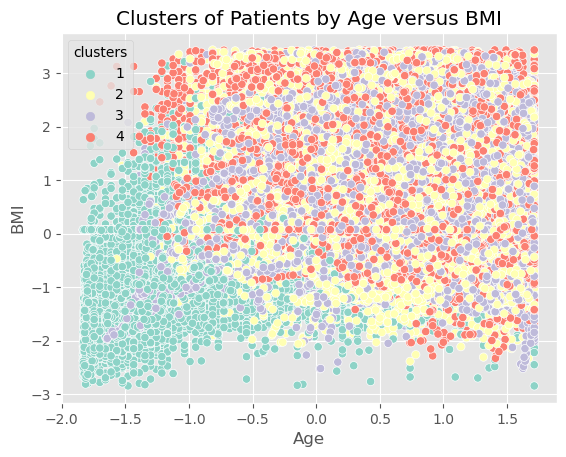

In [22]:
#pal is a predefined color palette with at least 4 colors
pal = sns.color_palette('Set3', 4)

# Create a new column 'bmi/age' by dividing 'bmi' by 'age'
df_resampled['bmi/age'] = df_resampled['bmi'] / df_resampled['age']

# Plot clusters using scatterplot
sns.scatterplot(data=df_resampled, x='age', y='bmi', hue='clusters', palette=pal)
plt.title('Clusters of Patients by Age versus BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

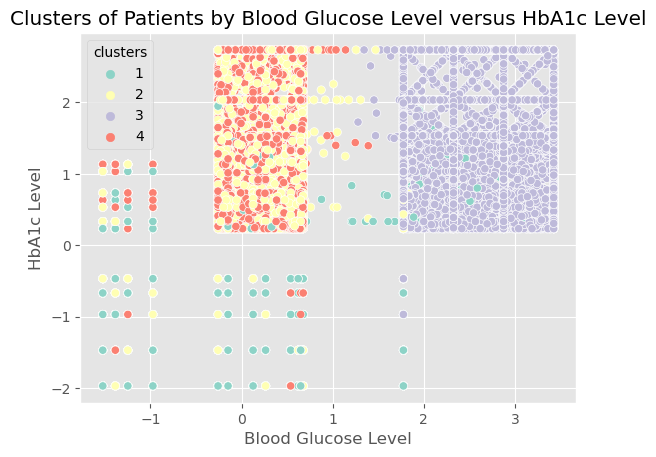

In [23]:
# pal is a predefined color palette with at least 4 colors
pal = sns.color_palette('Set3', 4)

# Plot clusters using scatterplot
sns.scatterplot(data=df_resampled, x='blood_glucose_level', y='HbA1c_level', hue='clusters', palette=pal)
plt.title('Clusters of Patients by Blood Glucose Level versus HbA1c Level')
plt.xlabel('Blood Glucose Level')
plt.ylabel('HbA1c Level')
plt.show()

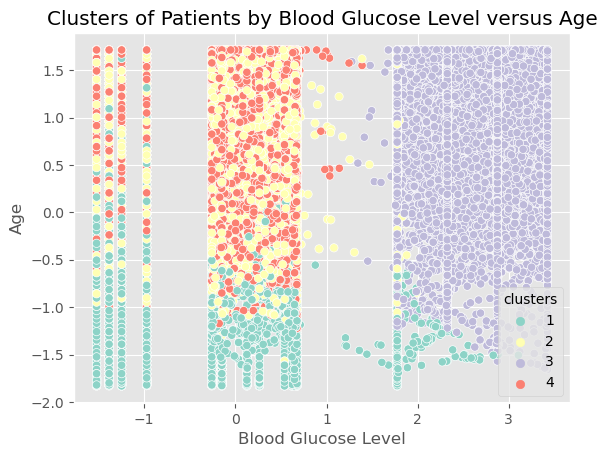

In [24]:
# pal is a predefined color palette with at least 4 colors
pal = sns.color_palette('Set3', 4)

# Plot clusters using scatterplot
sns.scatterplot(data=df_resampled, x='blood_glucose_level', y='age', hue='clusters', palette=pal)
plt.title('Clusters of Patients by Blood Glucose Level versus Age')
plt.xlabel('Blood Glucose Level')
plt.ylabel('Age')
plt.show()

<h1> Bisecting KMeans <h1>

In [25]:
df_resampled_bisect 

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_encoded,gender_encoded,diabetes
0,1.713008,0,1,-0.286437,1.134061,0.126046,-0.633042,-0.841116,0
1,0.560337,0,0,0.072849,1.134061,-1.523079,-0.633042,-0.841116,0
2,-0.592335,0,0,0.072849,0.232946,0.620784,-0.633042,1.188683,0
3,-0.237667,0,0,-0.579938,-0.467921,0.538328,1.579675,-0.841116,0
4,1.535674,1,1,-1.138266,-0.668169,0.538328,1.579675,1.188683,0
...,...,...,...,...,...,...,...,...,...
181139,1.702351,1,0,0.216381,1.154272,3.424297,1.579675,-0.841116,1
181140,-0.422583,0,0,2.054542,2.035177,0.462563,1.579675,-0.841116,1
181141,0.713162,1,0,0.029855,1.033937,2.324880,-0.633042,1.188683,1
181142,1.186506,0,0,1.989357,0.333070,2.874589,-0.633042,1.188683,1


In [26]:
X_bisect = df_resampled_bisect.iloc[:, 0:8]
y_bisect = df_resampled_bisect.iloc[:, -1]


# Instantiate BisectingKMeans with desired number of clusters
bkm = BisectingKMeans(n_clusters=4, random_state=424)

# Fit the model to the data
bkm.fit(X_bisect)



# Predict the clusters for the data points
labels = bkm.predict(X_bisect) + 1

# Print the cluster centers
print("Cluster centers:")
print(bkm.cluster_centers_)

X_bisect['clusters']=labels
X_bisect

Cluster centers:
[[ 9.56501671e-01  2.24044782e-01  1.19638782e-01  8.09812595e-01
   1.08891498e+00  1.21021250e+00 -6.33041677e-01  5.99356391e-02]
 [ 8.71127490e-01  2.25410590e-01  1.45480948e-01  7.18648476e-01
   9.54432655e-01  9.81690491e-01  1.57967483e+00  2.77002602e-01]
 [-1.06228750e+00  3.07415228e-03  9.62613340e-04 -7.57863784e-01
   8.71959788e-02  5.73042830e-02 -5.11632222e-01  1.26034865e-01]
 [ 3.83175885e-01  8.06954240e-02  3.85230441e-02  1.60268384e-01
  -2.44770792e-01 -3.69997148e-01 -4.23932627e-03 -1.76719067e-01]]


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_encoded,gender_encoded,clusters
0,1.713008,0,1,-0.286437,1.134061,0.126046,-0.633042,-0.841116,1
1,0.560337,0,0,0.072849,1.134061,-1.523079,-0.633042,-0.841116,4
2,-0.592335,0,0,0.072849,0.232946,0.620784,-0.633042,1.188683,3
3,-0.237667,0,0,-0.579938,-0.467921,0.538328,1.579675,-0.841116,4
4,1.535674,1,1,-1.138266,-0.668169,0.538328,1.579675,1.188683,2
...,...,...,...,...,...,...,...,...,...
181139,1.702351,1,0,0.216381,1.154272,3.424297,1.579675,-0.841116,2
181140,-0.422583,0,0,2.054542,2.035177,0.462563,1.579675,-0.841116,2
181141,0.713162,1,0,0.029855,1.033937,2.324880,-0.633042,1.188683,1
181142,1.186506,0,0,1.989357,0.333070,2.874589,-0.633042,1.188683,1


In [27]:
# Assign the 'clusters' column to the original DataFrame
df_resampled_bisect['clusters'] = X_bisect['clusters']

# Display the DataFrame with added 'clusters' column
df_resampled_bisect

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_encoded,gender_encoded,diabetes,clusters
0,1.713008,0,1,-0.286437,1.134061,0.126046,-0.633042,-0.841116,0,1
1,0.560337,0,0,0.072849,1.134061,-1.523079,-0.633042,-0.841116,0,4
2,-0.592335,0,0,0.072849,0.232946,0.620784,-0.633042,1.188683,0,3
3,-0.237667,0,0,-0.579938,-0.467921,0.538328,1.579675,-0.841116,0,4
4,1.535674,1,1,-1.138266,-0.668169,0.538328,1.579675,1.188683,0,2
...,...,...,...,...,...,...,...,...,...,...
181139,1.702351,1,0,0.216381,1.154272,3.424297,1.579675,-0.841116,1,2
181140,-0.422583,0,0,2.054542,2.035177,0.462563,1.579675,-0.841116,1,2
181141,0.713162,1,0,0.029855,1.033937,2.324880,-0.633042,1.188683,1,1
181142,1.186506,0,0,1.989357,0.333070,2.874589,-0.633042,1.188683,1,1


<h1> Logistic Prediction on bisect Cluster groups <h1>

In [28]:
# Iterate over unique cluster values
for cluster_value in df_resampled_bisect['clusters'].unique():
    # Create a DataFrame for the current cluster
    cluster_idx_bisect = df_resampled_bisect[df_resampled_bisect['clusters'] == cluster_value].copy()
    
    # Create a variable for the current DataFrame
    globals()[f'cluster_{cluster_value}_bisect'] = cluster_idx_bisect

In [29]:
X_cluster_1_bisect = cluster_1_bisect.drop('diabetes', axis=1)  # Features
X_cluster_1_bisect = X_cluster_1_bisect.drop('clusters', axis = 1)
y_cluster_1_bisect = cluster_1_bisect['diabetes']  # Target variable


# Split the data into training and test sets
X_train_cluster_1_bisect, X_test_cluster_1_bisect, y_train_cluster_1_bisect, y_test_cluster_1_bisect = train_test_split(X_cluster_1_bisect, y_cluster_1_bisect, test_size=0.3, random_state=424)

# Initialize the logistic regression model
logreg_1_bisect = LogisticRegression(random_state=424)

# Fit the model on the training data
logreg_1_bisect.fit(X_train_cluster_1_bisect, y_train_cluster_1_bisect)

# Make predictions on the test data
predictions_1_bisect = logreg_1_bisect.predict(X_test_cluster_1_bisect)

# Evaluate the model
accuracy = accuracy_score(y_test_cluster_1_bisect, predictions_1_bisect)
classification_rep = classification_report(y_test_cluster_1_bisect, predictions_1_bisect)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.8543752437914446
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.20      0.30      2413
           1       0.87      0.98      0.92     12969

    accuracy                           0.85     15382
   macro avg       0.74      0.59      0.61     15382
weighted avg       0.83      0.85      0.82     15382



In [30]:
X_cluster_2_bisect = cluster_2_bisect.drop('diabetes', axis=1)  # Features
X_cluster_2_bisect = X_cluster_2_bisect.drop('clusters', axis = 1)
y_cluster_2_bisect = cluster_2_bisect['diabetes']  # Target variable


# Split the data into training and test sets
X_train_cluster_2_bisect, X_test_cluster_2_bisect, y_train_cluster_2_bisect, y_test_cluster_2_bisect = train_test_split(X_cluster_2_bisect, y_cluster_2_bisect, test_size=0.3, random_state=424)

# Initialize the logistic regression model
logreg_2_bisect = LogisticRegression(random_state=424)

# Fit the model on the training data
logreg_2_bisect.fit(X_train_cluster_2_bisect, y_train_cluster_2_bisect)

# Make predictions on the test data
predictions_2_bisect = logreg_2_bisect.predict(X_test_cluster_2_bisect)

# Evaluate the model
accuracy = accuracy_score(y_test_cluster_2_bisect, predictions_2_bisect)
classification_rep = classification_report(y_test_cluster_2_bisect, predictions_2_bisect)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.8441505317698391
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.48      0.56      3108
           1       0.87      0.94      0.91     11560

    accuracy                           0.84     14668
   macro avg       0.78      0.71      0.73     14668
weighted avg       0.83      0.84      0.83     14668



In [31]:
X_cluster_3_bisect = cluster_3_bisect.drop('diabetes', axis=1)  # Features
X_cluster_3_bisect = X_cluster_3_bisect.drop('clusters', axis = 1)
y_cluster_3_bisect = cluster_3_bisect['diabetes']  # Target variable


# Split the data into training and test sets
X_train_cluster_3_bisect, X_test_cluster_3_bisect, y_train_cluster_3_bisect, y_test_cluster_3_bisect = train_test_split(X_cluster_3_bisect, y_cluster_3_bisect, test_size=0.3, random_state=424)

# Initialize the logistic regression model
logreg_3_bisect = LogisticRegression(random_state=424)

# Fit the model on the training data
logreg_3_bisect.fit(X_train_cluster_3_bisect, y_train_cluster_3_bisect)

# Make predictions on the test data
predictions_3_bisect = logreg_3_bisect.predict(X_test_cluster_3_bisect)

# Evaluate the model
accuracy = accuracy_score(y_test_cluster_3_bisect, predictions_3_bisect)
classification_rep = classification_report(y_test_cluster_3_bisect, predictions_3_bisect)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.9415725681135398
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      9008
           1       0.93      0.14      0.24       645

    accuracy                           0.94      9653
   macro avg       0.93      0.57      0.60      9653
weighted avg       0.94      0.94      0.92      9653



In [32]:
X_cluster_4_bisect = cluster_4_bisect.drop('diabetes', axis=1)  # Features
X_cluster_4_bisect = X_cluster_4_bisect.drop('clusters', axis = 1)
y_cluster_4_bisect = cluster_4_bisect['diabetes']  # Target variable


# Split the data into training and test sets
X_train_cluster_4_bisect, X_test_cluster_4_bisect, y_train_cluster_4_bisect, y_test_cluster_4_bisect = train_test_split(X_cluster_4_bisect, y_cluster_4_bisect, test_size=0.3, random_state=424)

# Initialize the logistic regression model
logreg_4_bisect = LogisticRegression(random_state=424)

# Fit the model on the training data
logreg_4_bisect.fit(X_train_cluster_4_bisect, y_train_cluster_4_bisect)

# Make predictions on the test data
predictions_4_bisect = logreg_4_bisect.predict(X_test_cluster_4_bisect)

# Evaluate the model
accuracy = accuracy_score(y_test_cluster_4_bisect, predictions_4_bisect)
classification_rep = classification_report(y_test_cluster_4_bisect, predictions_4_bisect)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.8696899330692528
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93     12558
           1       0.56      0.38      0.45      2084

    accuracy                           0.87     14642
   macro avg       0.73      0.66      0.69     14642
weighted avg       0.85      0.87      0.86     14642



In [33]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Combine features and labels from all clusters
X_bisect_combined = np.concatenate((X_cluster_1_bisect, X_cluster_3_bisect, X_cluster_2_bisect, X_cluster_4_bisect), axis=0)
y_bisect_combined = np.concatenate((y_cluster_1_bisect, y_cluster_3_bisect, y_cluster_2_bisect, y_cluster_4_bisect), axis=0)

# Split the bisect_combined data into training and test sets
X_train_bisect_combined, X_test_bisect_combined, y_train_bisect_combined, y_test_bisect_combined = train_test_split(X_bisect_combined, y_bisect_combined, test_size=0.3, random_state=424)

# Create a list of tuples where each tuple is (model_name, model_instance)
model_tuple_list = [('cluster_1_bisect', logreg_1_bisect), ('cluster_2_bisect', logreg_2_bisect), ('cluster_3_bisect', logreg_3_bisect), ('cluster_4_bisect', logreg_4_bisect)]

# Create a VotingClassifier
voting_clf = VotingClassifier(estimators=model_tuple_list, voting='hard')

# Fit the VotingClassifier on the bisect_combined training set
voting_clf.fit(X_train_bisect_combined, y_train_bisect_combined)

# Make predictions using the ensemble model on the bisect_combined test set
ensemble_predictions_bisect = voting_clf.predict(X_test_bisect_combined)

# Evaluate the ensemble model
accuracy_ensemble_bisect = accuracy_score(y_test_bisect_combined, ensemble_predictions)

# Calculate precision
precision_ensemble_bisect = precision_score(y_test_bisect_combined, ensemble_predictions_bisect, average='weighted')

# Calculate recall
recall_ensemble_bisect = recall_score(y_test_bisect_combined, ensemble_predictions_bisect, average='weighted')

# Calculate F1-score
f1_ensemble_bisect = f1_score(y_test_bisect_combined, ensemble_predictions_bisect, average='weighted')

classification_report_ensemble_bisect = classification_report(y_test_bisect_combined, ensemble_predictions_bisect)

print(f"Ensemble Bisect Model Accuracy: {accuracy_ensemble_bisect}")
print(f"Ensemble Bisect Model Precision: {precision_ensemble_bisect}")
print(f"Ensemble Bisect Model Recall: {recall_ensemble_bisect}")
print(f"Ensemble Bisect Model F1-score: {f1_ensemble_bisect}")


print("Ensemble Bisect Model Classification Report:")
print(classification_report_ensemble_bisect)

Ensemble Bisect Model Accuracy: 0.46251656116590606
Ensemble Bisect Model Precision: 0.869636634434575
Ensemble Bisect Model Recall: 0.8694612100691889
Ensemble Bisect Model F1-score: 0.8694400285308117
Ensemble Bisect Model Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87     27082
           1       0.86      0.88      0.87     27262

    accuracy                           0.87     54344
   macro avg       0.87      0.87      0.87     54344
weighted avg       0.87      0.87      0.87     54344



In [34]:
from sklearn.metrics import roc_auc_score
# Create a VotingClassifier
voting_clf = VotingClassifier(estimators=model_tuple_list, voting='soft')

# Fit the VotingClassifier on the bisect_combined training set
voting_clf.fit(X_train_bisect_combined, y_train_bisect_combined)


# Calculate predicted probabilities for each class
ensemble_probabilities = voting_clf.predict_proba(X_test_bisect_combined)

# Extract the predicted probabilities for the positive class (class 1)
positive_class_probabilities = ensemble_probabilities[:, 1]

# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test_bisect_combined, positive_class_probabilities)

print(f"AUC-ROC Score: {auc_roc}")



AUC-ROC Score: 0.948483700501943


<h1>Random Forests model on bisect clusters<h1>

In [35]:
# Split the data into training and test sets
X_train_cluster_1_bisect, X_test_cluster_1_bisect, y_train_cluster_1_bisect, y_test_cluster_1_bisect = train_test_split(X_cluster_1_bisect, y_cluster_1_bisect, test_size=0.3, random_state=424)


# Create and train the first Random Forest model
rf_model1_bisect = RandomForestClassifier(n_estimators=100, random_state=424)
rf_model1_bisect.fit(X_train_cluster_1_bisect, y_train_cluster_1_bisect)


# Make predictions using the first Random Forest model
y_pred_rf1_bisect = rf_model1_bisect.predict(X_test_cluster_1_bisect)


# Calculate accuracy for the first Random Forest model
accuracy_rf1_bisect = accuracy_score(y_test_cluster_1_bisect, y_pred_rf1_bisect)
print("Random Forest Model 1 Bisect Accuracy:", accuracy_rf1_bisect)

classification_rep = classification_report(y_test_cluster_1_bisect, y_pred_rf1_bisect)

print("Classification Report:")
print(classification_rep)

# Perform cross-validation
cv_scores = cross_val_score(rf_model1_bisect, X_train_cluster_1_bisect, y_train_cluster_1_bisect, cv=5, scoring='accuracy')
print("Cross-validated Biscet Accuracy Scores:", cv_scores)
print("Mean Cross-validated Bisect Accuracy:", cv_scores.mean())




Random Forest Model 1 Bisect Accuracy: 0.9682095956312573
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.86      0.89      2413
           1       0.97      0.99      0.98     12969

    accuracy                           0.97     15382
   macro avg       0.95      0.92      0.94     15382
weighted avg       0.97      0.97      0.97     15382

Cross-validated Biscet Accuracy Scores: [0.96433547 0.96544999 0.96823628 0.96391753 0.9651665 ]
Mean Cross-validated Bisect Accuracy: 0.9654211525913656


In [36]:
# Split the data into training and test sets
X_train_cluster_2_bisect, X_test_cluster_2_bisect, y_train_cluster_2_bisect, y_test_cluster_2_bisect = train_test_split(X_cluster_2_bisect, y_cluster_2_bisect, test_size=0.3, random_state=424)


# Create and train the first Random Forest model
rf_model2_bisect = RandomForestClassifier(n_estimators=100, random_state=424)
rf_model2_bisect.fit(X_train_cluster_2_bisect, y_train_cluster_2_bisect)


# Make predictions using the first Random Forest model
y_pred_rf2_bisect = rf_model2_bisect.predict(X_test_cluster_2_bisect)


# Calculate accuracy for the first Random Forest model
accuracy_rf2_bisect = accuracy_score(y_test_cluster_2_bisect, y_pred_rf2_bisect)
print("Random Forest Model 2 Bisect Accuracy:", accuracy_rf2_bisect)

classification_rep = classification_report(y_test_cluster_2_bisect, y_pred_rf2_bisect)

print("Classification Report:")
print(classification_rep)

# Perform cross-validation
cv_scores = cross_val_score(rf_model2_bisect, X_train_cluster_2_bisect, y_train_cluster_2_bisect, cv=5, scoring='accuracy')
print("Cross-validated Biscet Accuracy Scores:", cv_scores)
print("Mean Cross-validated Bisect Accuracy:", cv_scores.mean())




Random Forest Model 2 Bisect Accuracy: 0.9637987455685847
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.87      0.91      3108
           1       0.97      0.99      0.98     11560

    accuracy                           0.96     14668
   macro avg       0.96      0.93      0.94     14668
weighted avg       0.96      0.96      0.96     14668

Cross-validated Biscet Accuracy Scores: [0.95953251 0.95748722 0.95646457 0.96362308 0.96084733]
Mean Cross-validated Bisect Accuracy: 0.9595909422936449


In [37]:
# Split the data into training and test sets
X_train_cluster_3_bisect, X_test_cluster_3_bisect, y_train_cluster_3_bisect, y_test_cluster_3_bisect = train_test_split(X_cluster_3_bisect, y_cluster_3_bisect, test_size=0.3, random_state=424)


# Create and train the first Random Forest model
rf_model3_bisect = RandomForestClassifier(n_estimators=100, random_state=424)
rf_model3_bisect.fit(X_train_cluster_3_bisect, y_train_cluster_3_bisect)


# Make predictions using the first Random Forest model
y_pred_rf3_bisect = rf_model3_bisect.predict(X_test_cluster_3_bisect)


# Calculate accuracy for the first Random Forest model
accuracy_rf3_bisect = accuracy_score(y_test_cluster_3_bisect, y_pred_rf3_bisect)
print("Random Forest Model 3 Bisect Accuracy:", accuracy_rf3_bisect)

classification_rep = classification_report(y_test_cluster_3_bisect, y_pred_rf3_bisect)

print("Classification Report:")
print(classification_rep)

# Perform cross-validation
cv_scores = cross_val_score(rf_model3_bisect, X_train_cluster_3_bisect, y_train_cluster_3_bisect, cv=5, scoring='accuracy')
print("Cross-validated Biscet Accuracy Scores:", cv_scores)
print("Mean Cross-validated Bisect Accuracy:", cv_scores.mean())






Random Forest Model 3 Bisect Accuracy: 0.9890189578369419
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      9008
           1       0.99      0.85      0.91       645

    accuracy                           0.99      9653
   macro avg       0.99      0.92      0.95      9653
weighted avg       0.99      0.99      0.99      9653

Cross-validated Biscet Accuracy Scores: [0.99134295 0.98823268 0.99000888 0.98667851 0.98712256]
Mean Cross-validated Bisect Accuracy: 0.9886771162099345


In [38]:
# Split the data into training and test sets
X_train_cluster_4_bisect, X_test_cluster_4_bisect, y_train_cluster_4_bisect, y_test_cluster_4_bisect = train_test_split(X_cluster_4_bisect, y_cluster_4_bisect, test_size=0.3, random_state=424)


# Create and train the first Random Forest model
rf_model4_bisect = RandomForestClassifier(n_estimators=100, random_state=424)
rf_model4_bisect.fit(X_train_cluster_4_bisect, y_train_cluster_4_bisect)


# Make predictions using the first Random Forest model
y_pred_rf4_bisect = rf_model4_bisect.predict(X_test_cluster_4_bisect)


# Calculate accuracy for the first Random Forest model
accuracy_rf4_bisect = accuracy_score(y_test_cluster_4_bisect, y_pred_rf4_bisect)
print("Random Forest Model 4 Bisect Accuracy:", accuracy_rf4_bisect)

classification_rep = classification_report(y_test_cluster_4_bisect, y_pred_rf4_bisect)

print("Classification Report:")
print(classification_rep)

# Perform cross-validation
cv_scores = cross_val_score(rf_model4_bisect, X_train_cluster_4_bisect, y_train_cluster_4_bisect, cv=5, scoring='accuracy')
print("Cross-validated Biscet Accuracy Scores:", cv_scores)
print("Mean Cross-validated Bisect Accuracy:", cv_scores.mean())




Random Forest Model 4 Bisect Accuracy: 0.9840185766971725
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12558
           1       0.95      0.93      0.94      2084

    accuracy                           0.98     14642
   macro avg       0.97      0.96      0.97     14642
weighted avg       0.98      0.98      0.98     14642

Cross-validated Biscet Accuracy Scores: [0.98448705 0.97658422 0.98243817 0.98097468 0.9824356 ]
Mean Cross-validated Bisect Accuracy: 0.9813839436732676


In [78]:
from sklearn.metrics import roc_auc_score

# Combine features and labels from all clusters
X_bisect_combined_rf = np.concatenate((X_cluster_1_bisect, X_cluster_2_bisect, X_cluster_3_bisect, X_cluster_4_bisect), axis=0)
y_bisect_combined_rf = np.concatenate((y_cluster_1_bisect, y_cluster_2_bisect, y_cluster_3_bisect, y_cluster_4_bisect), axis=0)

# Split the combined_rf data into training and test sets
X_train_combined_rf_bisect, X_test_combined_rf_bisect, y_train_combined_rf_bisect, y_test_combined_rf_bisect = train_test_split(X_bisect_combined_rf, y_bisect_combined_rf, test_size=0.3, random_state=424)

# Create a list of tuples where each tuple is (model_name, model_instance)
model_tuple_list = [('cluster_1_bisect', rf_model1_bisect), ('cluster_2_bisect', rf_model2_bisect), ('cluster_3_bisect', rf_model3_bisect), ('cluster_4_bisect', rf_model4_bisect)]

# Create a VotingClassifier
voting_clf = VotingClassifier(estimators=model_tuple_list, voting='hard')

# Fit the VotingClassifier on the combined_rf training set
voting_clf.fit(X_train_combined_rf_bisect, y_train_combined_rf_bisect)

# Make predictions using the ensemble model on the combined_rf test set
ensemble_predictions = voting_clf.predict(X_test_combined_rf_bisect)

# Evaluate the ensemble model
accuracy_ensemble = accuracy_score(y_test_combined_rf_bisect, ensemble_predictions)

# Calculate precision
precision_ensemble = precision_score(y_test_combined_rf_bisect, ensemble_predictions, average='weighted')

# Calculate recall
recall_ensemble = recall_score(y_test_combined_rf_bisect, ensemble_predictions, average='weighted')

# Calculate F1-score
f1_ensemble = f1_score(y_test_combined_rf_bisect, ensemble_predictions, average='weighted')



classification_report_ensemble = classification_report(y_test_combined_rf_bisect, ensemble_predictions)

print(f"Ensemble Model Accuracy: {accuracy_ensemble}")
print(f"Ensemble Model Precision: {precision_ensemble}")
print(f"Ensemble Model Recall: {recall_ensemble}")
print(f"Ensemble Model F1-score: {f1_ensemble}")



print("Ensemble Model Classification Report:")
print(classification_report_ensemble)

Ensemble Model Accuracy: 0.9771271897541587
Ensemble Model Precision: 0.9771776508533784
Ensemble Model Recall: 0.9771271897541587
Ensemble Model F1-score: 0.9771262908823097
Ensemble Model Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     27106
           1       0.97      0.98      0.98     27238

    accuracy                           0.98     54344
   macro avg       0.98      0.98      0.98     54344
weighted avg       0.98      0.98      0.98     54344



In [80]:
# Fit the VotingClassifier on the combined_rf training set
voting_clf.fit(X_train_combined_rf_bisect, y_train_combined_rf_bisect)

# Initialize an empty array to store the predicted probabilities
ensemble_probabilities = np.zeros((len(X_test_combined_rf_bisect), 2))  # Assuming binary classification

# Iterate over individual models in the ensemble
for estimator in voting_clf.estimators_:
    # Calculate the predicted probabilities for each class
    class_probabilities = estimator.predict_proba(X_test_combined_rf_bisect)
    # Aggregate the predicted probabilities
    ensemble_probabilities += class_probabilities

# Take the average of the predicted probabilities
ensemble_probabilities /= len(voting_clf.estimators_)

# Extract the probabilities for the positive class (assuming binary classification)
positive_class_probabilities = ensemble_probabilities[:, 1]

# Now you can use positive_class_probabilities for further analysis, such as calculating AUC-ROC
# Calculate AUC-ROC
auc = roc_auc_score(y_test_combined_rf_bisect, positive_class_probabilities)

print(f"Ensemble Model AUC-ROC: {auc}")


Ensemble Model AUC-ROC: 0.9977835030743889


<h1>EDA on categorical variables bisect df<h1>

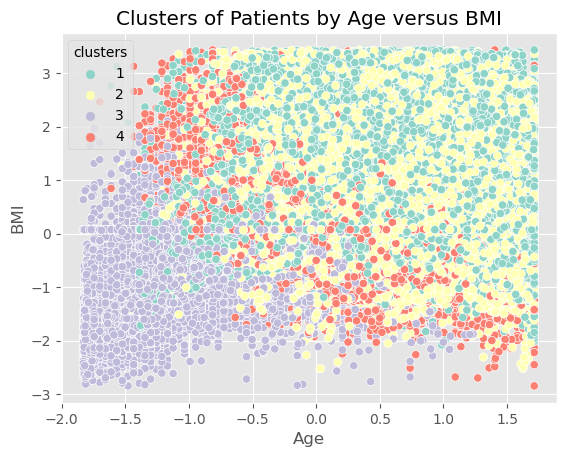

In [40]:
#pal is a predefined color palette with at least 4 colors
pal = sns.color_palette('Set3', 4)

# Create a new column 'bmi/age' by dividing 'bmi' by 'age'
df_resampled_bisect['bmi/age'] = df_resampled_bisect['bmi'] / df_resampled_bisect['age']

# Plot clusters using scatterplot
sns.scatterplot(data=df_resampled_bisect, x='age', y='bmi', hue='clusters', palette=pal)
plt.title('Clusters of Patients by Age versus BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

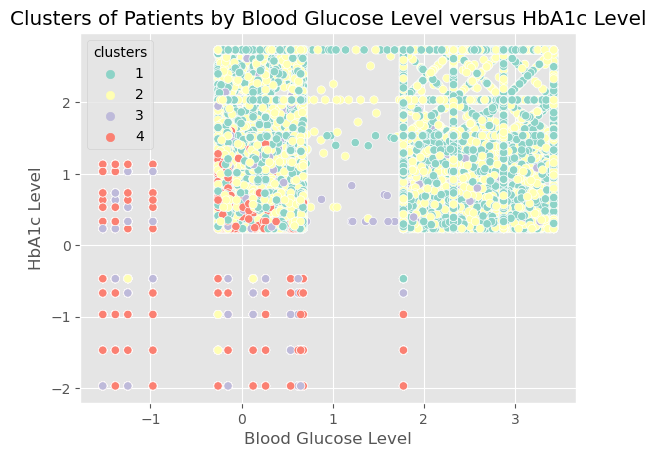

In [41]:
# pal is a predefined color palette with at least 4 colors
pal = sns.color_palette('Set3', 4)

# Plot clusters using scatterplot
sns.scatterplot(data=df_resampled_bisect, x='blood_glucose_level', y='HbA1c_level', hue='clusters', palette=pal)
plt.title('Clusters of Patients by Blood Glucose Level versus HbA1c Level')
plt.xlabel('Blood Glucose Level')
plt.ylabel('HbA1c Level')
plt.show()



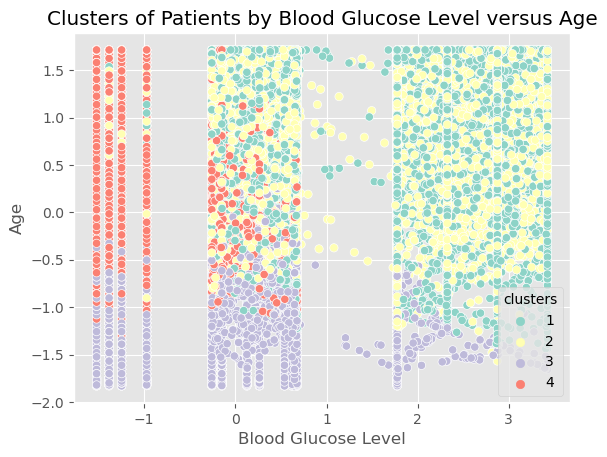

In [42]:
# pal is a predefined color palette with at least 4 colors
pal = sns.color_palette('Set3', 4)

# Plot clusters using scatterplot
sns.scatterplot(data=df_resampled_bisect, x='blood_glucose_level', y='age', hue='clusters', palette=pal)
plt.title('Clusters of Patients by Blood Glucose Level versus Age')
plt.xlabel('Blood Glucose Level')
plt.ylabel('Age')
plt.show()

<h1> Features Importance Incorporated <h1>

<h1>K-Means Important Clustering <h1>

In [43]:
columns_to_drop = ["hypertension", "heart_disease", "smoking_history_encoded", "gender_encoded"]
df_resampled_imp = df_resampled.copy()
df_resampled_imp = df_resampled_imp.drop(columns=columns_to_drop)

df_important_bisect = df_resampled_imp.copy()

In [44]:
X_important = df_resampled_imp.iloc[:, 0:4]
y = df_resampled_imp.iloc[:, -1]

In [45]:
# Fit KMeans model
model=KMeans(n_clusters=4, n_init=10, random_state=424)
model.fit(X_important)

labels=model.labels_ + 1
labels  #clustering into 2 groups: 0 and 1

centers=model.cluster_centers_
centers

model.inertia_

X_important['clusters']=labels
X_important

,age,bmi,HbA1c_level,blood_glucose_level,clusters
0,1.713008,-0.286437,1.134061,0.126046,4
1,0.560337,0.072849,1.134061,-1.523079,4
2,-0.592335,0.072849,0.232946,0.620784,3
3,-0.237667,-0.579938,-0.467921,0.538328,3
4,1.535674,-1.138266,-0.668169,0.538328,1
...,...,...,...,...,...
181139,1.702351,0.216381,1.154272,3.424297,2
181140,-0.422583,2.054542,2.035177,0.462563,4
181141,0.713162,0.029855,1.033937,2.324880,2
181142,1.186506,1.989357,0.333070,2.874589,2


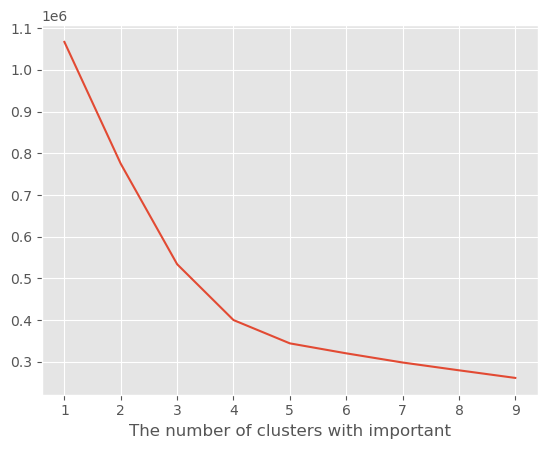

In [46]:
inertia_train={}
for n_cluster in range(1,10):
    model=KMeans(n_clusters=n_cluster, n_init=10, random_state =424)
    model.fit(X_important)
    inertia_train[n_cluster]=model.inertia_
    
plt.plot(range(1,10),inertia_train.values())
plt.xlabel('The number of clusters with important') #inertia is the measure of each dots to its centers: tight clusters, low inertia
plt.show()

In [47]:
# Assign the 'clusters' column to the original DataFrame
df_resampled_imp['clusters'] = X_important['clusters']

# Display the DataFrame with added 'clusters' column
df_resampled_imp

,age,bmi,HbA1c_level,blood_glucose_level,diabetes,clusters,bmi/age
0,1.713008,-0.286437,1.134061,0.126046,0,4,-0.167213
1,0.560337,0.072849,1.134061,-1.523079,0,4,0.130010
2,-0.592335,0.072849,0.232946,0.620784,0,3,-0.122987
3,-0.237667,-0.579938,-0.467921,0.538328,0,3,2.440134
4,1.535674,-1.138266,-0.668169,0.538328,0,1,-0.741216
...,...,...,...,...,...,...,...
181139,1.702351,0.216381,1.154272,3.424297,1,2,0.127107
181140,-0.422583,2.054542,2.035177,0.462563,1,4,-4.861864
181141,0.713162,0.029855,1.033937,2.324880,1,2,0.041862
181142,1.186506,1.989357,0.333070,2.874589,1,2,1.676652


In [48]:
important_1 = df_resampled_imp[df_resampled_imp["clusters"] == 1]
important_2 = df_resampled_imp[df_resampled_imp["clusters"] == 2]
important_3 = df_resampled_imp[df_resampled_imp["clusters"] == 3]
important_4 = df_resampled_imp[df_resampled_imp["clusters"] == 4]

In [49]:
X_important_2 = important_2.drop('diabetes', axis=1)  # Features
X_important_2 = X_important_2.drop('clusters', axis = 1)
y_important_2 = important_2['diabetes']  # Target variable


# Split the data into training and test sets
X_train_important_2, X_test_important_2, y_train_important_2, y_test_important_2 = train_test_split(X_important_2, y_important_2, test_size=0.1, random_state=424)

# Initialize the logistic regression model
logreg_2 = LogisticRegression(random_state=424)

# Fit the model on the training data
logreg_2.fit(X_train_important_2, y_train_important_2)

# Make predictions on the test data
predictions_2 = logreg_2.predict(X_test_important_2)

# Evaluate the model
accuracy = accuracy_score(y_test_important_2, predictions_2)
classification_rep = classification_report(y_test_important_2, predictions_2)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.9343941931881631
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.57      0.64       362
           1       0.95      0.98      0.96      3220

    accuracy                           0.93      3582
   macro avg       0.84      0.77      0.80      3582
weighted avg       0.93      0.93      0.93      3582



In [50]:
X_important_3 = important_3.drop('diabetes', axis=1)  # Features
X_important_3 = X_important_3.drop('clusters', axis = 1)
y_important_3 = important_3['diabetes']  # Target variable


# Split the data into training and test sets
X_train_important_3, X_test_important_3, y_train_important_3, y_test_important_3 = train_test_split(X_important_3, y_important_3, test_size=0.1, random_state=424)

# Initialize the logistic regression model
logreg_3 = LogisticRegression(random_state=424)

# Fit the model on the training data
logreg_3.fit(X_train_important_3, y_train_important_3)

# Make predictions on the test data
predictions_3 = logreg_3.predict(X_test_important_3)

# Evaluate the model
accuracy = accuracy_score(y_test_important_3, predictions_3)
classification_rep = classification_report(y_test_important_3, predictions_3)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.9315068493150684
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      3242
           1       0.84      0.10      0.18       262

    accuracy                           0.93      3504
   macro avg       0.89      0.55      0.57      3504
weighted avg       0.93      0.93      0.91      3504



In [51]:
X_important_4 = important_4.drop('diabetes', axis=1)  # Features
X_important_4 = X_important_4.drop('clusters', axis = 1)
y_important_4 = important_4['diabetes']  # Target variable


# Split the data into training and test sets
X_train_important_4, X_test_important_4, y_train_important_4, y_test_important_4 = train_test_split(X_important_4, y_important_4, test_size=0.1, random_state=424)

# Initialize the logistic regression model
logreg_4 = LogisticRegression(random_state=424)

# Fit the model on the training data
logreg_4.fit(X_train_important_4, y_train_important_4)

# Make predictions on the test data
predictions_4 = logreg_4.predict(X_test_important_4)

# Evaluate the model
accuracy = accuracy_score(y_test_important_4, predictions_4)
classification_rep = classification_report(y_test_important_4, predictions_4)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.7736126424108783
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.51      0.59      2582
           1       0.80      0.90      0.84      5581

    accuracy                           0.77      8163
   macro avg       0.75      0.70      0.72      8163
weighted avg       0.76      0.77      0.76      8163



In [54]:
X_important_1 = important_1.drop('diabetes', axis=1)  # Features
X_important_1 = X_important_1.drop('clusters', axis = 1)
y_important_1 = important_1['diabetes']  # Target variable


# Split the data into training and test sets
X_train_important_1, X_test_important_1, y_train_important_1, y_test_important_1 = train_test_split(X_important_1, y_important_1, test_size=0.1, random_state=424)


In [55]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

# Combine features and labels from all importants
X_combined_important = np.concatenate((X_important_1, X_important_3, X_important_2, X_important_4), axis=0)
y_combined_important = np.concatenate((y_important_1, y_important_3, y_important_2, y_important_4), axis=0)

# Split the combined_important data into training and test sets
X_train_combined_important, X_test_combined_important, y_train_combined_important, y_test_combined_important = train_test_split(X_combined_important, y_combined_important, test_size=0.3, random_state=424)

# Create a list of tuples where each tuple is (model_name, model_instance)
model_tuple_list = [('important_3', logreg_3), ('important_2', logreg_2), ('important_4', logreg_4)]

# Create a VotingClassifier
voting_clf = VotingClassifier(estimators=model_tuple_list, voting='hard')

# Fit the VotingClassifier on the combined_important training set
voting_clf.fit(X_train_combined_important, y_train_combined_important)

# Make predictions using the ensemble model on the combined_important test set
ensemble_predictions = voting_clf.predict(X_test_combined_important)

# Evaluate the ensemble model
accuracy_ensemble = accuracy_score(y_test_combined_important, ensemble_predictions)
# Calculate precision
precision_ensemble = precision_score(y_test_combined_important, ensemble_predictions, average='weighted')
# Calculate recall
recall_ensemble = recall_score(y_test_combined_important, ensemble_predictions, average='weighted')
# Calculate F1-score
f1_ensemble = f1_score(y_test_combined_important, ensemble_predictions, average='weighted')
# Calculate the AUC score
auc_ensemble = roc_auc_score(y_test_combined_important, ensemble_predictions)


classification_report_ensemble = classification_report(y_test_combined_important, ensemble_predictions)

print(f"Ensemble Model Accuracy: {accuracy_ensemble}")
print(f"Ensemble Model Precision: {precision_ensemble}")
print(f"Ensemble Model Recall: {recall_ensemble}")
print(f"Ensemble Model f1: {f1_ensemble}")
print(f"Ensemble Model AUC ROC: {auc_ensemble}")
print("Ensemble Model Classification Report:")
print(classification_report_ensemble)

Ensemble Model Accuracy: 0.8624871190931842
Ensemble Model Precision: 0.8629560223811056
Ensemble Model Recall: 0.8624871190931842
Ensemble Model f1: 0.8624649970350213
Ensemble Model AUC ROC: 0.8626149460309757
Ensemble Model Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.86     27387
           1       0.85      0.88      0.86     26957

    accuracy                           0.86     54344
   macro avg       0.86      0.86      0.86     54344
weighted avg       0.86      0.86      0.86     54344



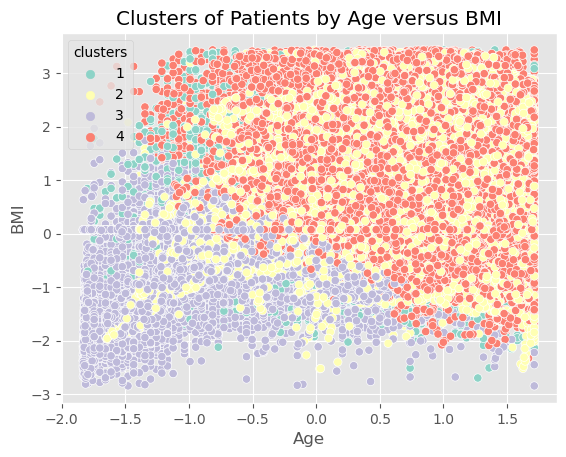

In [56]:
#pal is a predefined color palette with at least 4 colors
pal = sns.color_palette('Set3', 4)

# Plot clusters using scatterplot
sns.scatterplot(data=df_resampled_imp, x='age', y='bmi', hue='clusters', palette=pal)
plt.title('Clusters of Patients by Age versus BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

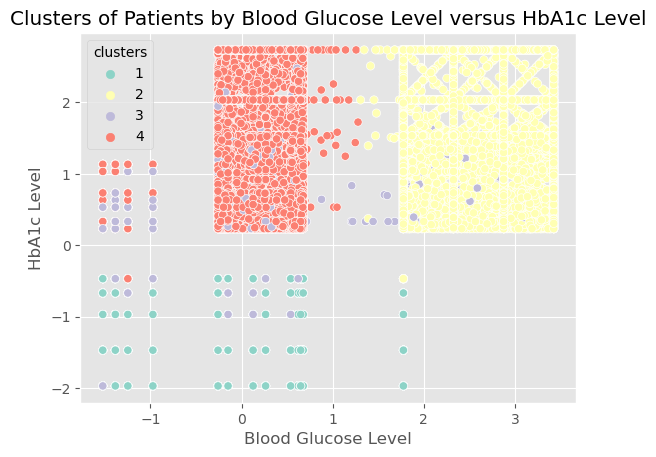

In [57]:
# pal is a predefined color palette with at least 4 colors
pal = sns.color_palette('Set3', 4)

# Plot clusters using scatterplot
sns.scatterplot(data=df_resampled_imp, x='blood_glucose_level', y='HbA1c_level', hue='clusters', palette=pal)
plt.title('Clusters of Patients by Blood Glucose Level versus HbA1c Level')
plt.xlabel('Blood Glucose Level')
plt.ylabel('HbA1c Level')
plt.show()

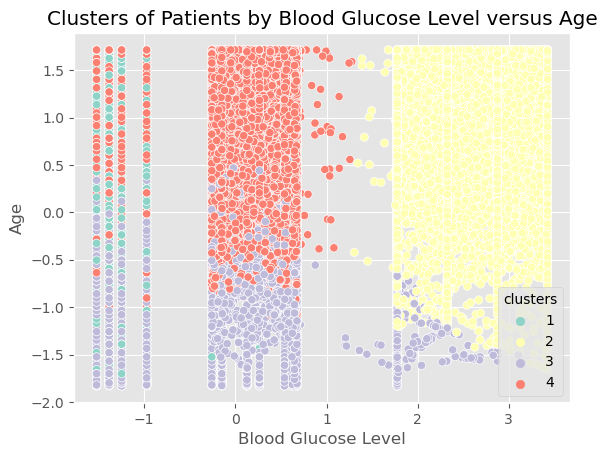

In [58]:
# pal is a predefined color palette with at least 4 colors
pal = sns.color_palette('Set3', 4)

# Plot clusters using scatterplot
sns.scatterplot(data=df_resampled_imp, x='blood_glucose_level', y='age', hue='clusters', palette=pal)
plt.title('Clusters of Patients by Blood Glucose Level versus Age')
plt.xlabel('Blood Glucose Level')
plt.ylabel('Age')
plt.show()

<h1>Bisect K-Means Important Clustering <h1>

In [59]:
X_important_bisect = df_important_bisect.iloc[:, 0:4]
y_bisect = df_important_bisect.iloc[:, -1]


# Instantiate BisectingKMeans with desired number of clusters
bkm = BisectingKMeans(n_clusters=4, random_state=424)

# Fit the model to the data
bkm.fit(X_important_bisect)



# Predict the clusters for the data points
labels = bkm.predict(X_important_bisect) + 1

# Print the cluster centers
print("Cluster centers:")
print(bkm.cluster_centers_)

X_important_bisect['clusters']=labels
X_important_bisect

Cluster centers:
[[ 0.86914932  0.68197462  1.00835685  2.51086631]
 [ 0.94297034  0.82132859  1.05318963  0.31217349]
 [-0.31495169 -0.34284938  0.58496301 -0.29407208]
 [-0.03619895 -0.03876992 -1.16860454 -0.11991377]]


,age,bmi,HbA1c_level,blood_glucose_level,clusters
0,1.713008,-0.286437,1.134061,0.126046,2
1,0.560337,0.072849,1.134061,-1.523079,3
2,-0.592335,0.072849,0.232946,0.620784,3
3,-0.237667,-0.579938,-0.467921,0.538328,4
4,1.535674,-1.138266,-0.668169,0.538328,4
...,...,...,...,...,...
181139,1.702351,0.216381,1.154272,3.424297,1
181140,-0.422583,2.054542,2.035177,0.462563,2
181141,0.713162,0.029855,1.033937,2.324880,1
181142,1.186506,1.989357,0.333070,2.874589,1


In [60]:
# Assign the 'clusters' column to the original DataFrame
df_important_bisect['clusters'] = X_important_bisect['clusters']

# Display the DataFrame with added 'clusters' column
df_important_bisect

,age,bmi,HbA1c_level,blood_glucose_level,diabetes,clusters,bmi/age
0,1.713008,-0.286437,1.134061,0.126046,0,2,-0.167213
1,0.560337,0.072849,1.134061,-1.523079,0,3,0.130010
2,-0.592335,0.072849,0.232946,0.620784,0,3,-0.122987
3,-0.237667,-0.579938,-0.467921,0.538328,0,4,2.440134
4,1.535674,-1.138266,-0.668169,0.538328,0,4,-0.741216
...,...,...,...,...,...,...,...
181139,1.702351,0.216381,1.154272,3.424297,1,1,0.127107
181140,-0.422583,2.054542,2.035177,0.462563,1,2,-4.861864
181141,0.713162,0.029855,1.033937,2.324880,1,1,0.041862
181142,1.186506,1.989357,0.333070,2.874589,1,1,1.676652


<h1> Logistic Prediction on important bisect Cluster groups <h1>

In [61]:
# Iterate over unique cluster values
for cluster_value in df_important_bisect['clusters'].unique():
    # Create a DataFrame for the current cluster
    cluster_idx_important_bisect = df_important_bisect[df_important_bisect['clusters'] == cluster_value].copy()
    
    # Create a variable for the current DataFrame
    globals()[f'cluster_{cluster_value}_important_bisect'] = cluster_idx_important_bisect

In [62]:
cluster_1_important_bisect

,age,bmi,HbA1c_level,blood_glucose_level,diabetes,clusters,bmi/age
6,0.117001,-1.278269,1.033937,1.775172,1,1,-10.925241
12,1.136672,-0.202098,0.333070,1.775172,0,1,-0.177798
15,-1.168670,0.585633,0.633442,1.775172,0,1,-0.501111
25,1.136672,0.072849,1.033937,1.775172,1,1,0.064090
29,0.516003,0.820097,-1.469161,1.775172,0,1,1.589326
...,...,...,...,...,...,...,...
181130,1.681960,0.629762,0.668501,3.424297,1,1,0.374421
181132,1.339334,2.605179,1.347021,2.289985,1,1,1.945130
181139,1.702351,0.216381,1.154272,3.424297,1,1,0.127107
181141,0.713162,0.029855,1.033937,2.324880,1,1,0.041862


In [63]:
X_1_important_bisect = cluster_1_important_bisect.drop('diabetes', axis=1)  # Features
X_1_important_bisect = X_1_important_bisect.drop('clusters', axis = 1)
y_1_important_bisect = cluster_1_important_bisect['diabetes']  # Target variable


# Split the data into training and test sets
X_train_1_important_bisect, X_test_1_important_bisect, y_train_1_important_bisect, y_test_1_important_bisect = train_test_split(X_1_important_bisect, y_1_important_bisect, test_size=0.3, random_state=424)

# Initialize the logistic regression model
logreg_1_important_bisect = LogisticRegression(random_state=424)

# Fit the model on the training data
logreg_1_important_bisect.fit(X_train_1_important_bisect, y_train_1_important_bisect)

# Make predictions on the test data
predictions_1_important_bisect = logreg_1_important_bisect.predict(X_test_1_important_bisect)

# Evaluate the model
accuracy = accuracy_score(y_test_1_important_bisect, predictions_1_important_bisect)
classification_rep = classification_report(y_test_1_important_bisect, predictions_1_important_bisect)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.9370380509170545
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.64      0.70      1264
           1       0.95      0.98      0.96      9695

    accuracy                           0.94     10959
   macro avg       0.86      0.81      0.83     10959
weighted avg       0.93      0.94      0.93     10959



In [64]:
X_2_important_bisect = cluster_2_important_bisect.drop('diabetes', axis=1)  # Features
X_2_important_bisect = X_2_important_bisect.drop('clusters', axis = 1)
y_2_important_bisect = cluster_2_important_bisect['diabetes']  # Target variable


# Split the data into training and test sets
X_train_2_important_bisect, X_test_2_important_bisect, y_train_2_important_bisect, y_test_2_important_bisect = train_test_split(X_2_important_bisect, y_2_important_bisect, test_size=0.3, random_state=424)

# Initialize the logistic regression model
logreg_2_important_bisect = LogisticRegression(random_state=424)

# Fit the model on the training data
logreg_2_important_bisect.fit(X_train_2_important_bisect, y_train_2_important_bisect)

# Make predictions on the test data
predictions_2_important_bisect = logreg_2_important_bisect.predict(X_test_2_important_bisect)

# Evaluate the model
accuracy = accuracy_score(y_test_2_important_bisect, predictions_2_important_bisect)
classification_rep = classification_report(y_test_2_important_bisect, predictions_2_important_bisect)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.8014033264033265
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.21      0.32      4237
           1       0.81      0.97      0.88     15003

    accuracy                           0.80     19240
   macro avg       0.73      0.59      0.60     19240
weighted avg       0.78      0.80      0.76     19240



In [65]:
X_3_important_bisect = cluster_3_important_bisect.drop('diabetes', axis=1)  # Features
X_3_important_bisect = X_3_important_bisect.drop('clusters', axis = 1)
y_3_important_bisect = cluster_3_important_bisect['diabetes']  # Target variable


# Split the data into training and test sets
X_train_3_important_bisect, X_test_3_important_bisect, y_train_3_important_bisect, y_test_3_important_bisect = train_test_split(X_3_important_bisect, y_3_important_bisect, test_size=0.3, random_state=424)

# Initialize the logistic regression model
logreg_3_important_bisect = LogisticRegression(random_state=424)

# Fit the model on the training data
logreg_3_important_bisect.fit(X_train_3_important_bisect, y_train_3_important_bisect)

# Make predictions on the test data
predictions_3_important_bisect = logreg_3_important_bisect.predict(X_test_3_important_bisect)

# Evaluate the model
accuracy = accuracy_score(y_test_3_important_bisect, predictions_3_important_bisect)
classification_rep = classification_report(y_test_3_important_bisect, predictions_3_important_bisect)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.8250228567409804
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90     11715
           1       0.51      0.15      0.23      2504

    accuracy                           0.83     14219
   macro avg       0.68      0.56      0.57     14219
weighted avg       0.78      0.83      0.78     14219



In [68]:
X_4_important_bisect = cluster_4_important_bisect.drop('diabetes', axis=1)  # Features
X_4_important_bisect = X_4_important_bisect.drop('clusters', axis = 1)
y_4_important_bisect = cluster_4_important_bisect['diabetes']  # Target variable


# Split the data into training and test sets
X_train_4_important_bisect, X_test_4_important_bisect, y_train_4_important_bisect, y_test_4_important_bisect = train_test_split(X_4_important_bisect, y_4_important_bisect, test_size=0.3, random_state=424)



In [69]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Combine features and labels from all clusters
X_important_bisect_combined = np.concatenate((X_1_important_bisect, X_3_important_bisect, X_2_important_bisect, X_4_important_bisect), axis=0)
y_important_bisect_combined = np.concatenate((y_1_important_bisect, y_3_important_bisect, y_2_important_bisect, y_4_important_bisect), axis=0)

# Split the bisect_combined data into training and test sets
X_train_important_bisect_combined, X_test_important_bisect_combined, y_train_important_bisect_combined, y_test_important_bisect_combined = train_test_split(X_important_bisect_combined, y_important_bisect_combined, test_size=0.3, random_state=424)

# Create a list of tuples where each tuple is (model_name, model_instance)
model_tuple_list = [('cluster_1_important_bisect', logreg_1_important_bisect), ('cluster_2_important_bisect', logreg_2_important_bisect), ('cluster_3_important_bisect', logreg_3_important_bisect)]

# Create a VotingClassifier
voting_clf = VotingClassifier(estimators=model_tuple_list, voting='hard')

# Fit the VotingClassifier on the bisect_combined training set
voting_clf.fit(X_train_important_bisect_combined, y_train_important_bisect_combined)

# Make predictions using the ensemble model on the bisect_combined test set
ensemble_predictions_important_bisect = voting_clf.predict(X_test_important_bisect_combined)

# Evaluate the ensemble model
accuracy_ensemble_important_bisect = accuracy_score(y_test_important_bisect_combined, ensemble_predictions_important_bisect)

# Calculate precision
precision_ensemble_important_bisect = precision_score(y_test_important_bisect_combined, ensemble_predictions_important_bisect, average='weighted')

# Calculate recall
recall_ensemble_important_bisect = recall_score(y_test_important_bisect_combined, ensemble_predictions_important_bisect, average='weighted')

# Calculate F1-score
f1_ensemble_important_bisect = f1_score(y_test_important_bisect_combined, ensemble_predictions_important_bisect, average='weighted')

classification_report_ensemble_important_bisect = classification_report(y_test_important_bisect_combined, ensemble_predictions_important_bisect)

print(f"Ensemble Bisect Model Accuracy: {accuracy_ensemble_important_bisect}")
print(f"Ensemble Bisect Model Precision: {precision_ensemble_important_bisect}")
print(f"Ensemble Bisect Model Recall: {recall_ensemble_important_bisect}")
print(f"Ensemble Bisect Model F1-score: {f1_ensemble_important_bisect}")


print("Ensemble Bisect Model Classification Report:")
print(classification_report_ensemble_important_bisect)

Ensemble Bisect Model Accuracy: 0.8654681289562786
Ensemble Bisect Model Precision: 0.8657444166384
Ensemble Bisect Model Recall: 0.8654681289562786
Ensemble Bisect Model F1-score: 0.8654373142367421
Ensemble Bisect Model Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.86     27106
           1       0.86      0.88      0.87     27238

    accuracy                           0.87     54344
   macro avg       0.87      0.87      0.87     54344
weighted avg       0.87      0.87      0.87     54344



In [70]:
from sklearn.metrics import roc_auc_score
# Create a VotingClassifier
voting_clf = VotingClassifier(estimators=model_tuple_list, voting='soft')

# Fit the VotingClassifier on the bisect_combined training set
voting_clf.fit(X_train_important_bisect_combined, y_train_important_bisect_combined)


# Calculate predicted probabilities for each class
ensemble_probabilities = voting_clf.predict_proba(X_test_important_bisect_combined)

# Extract the predicted probabilities for the positive class (class 1)
positive_class_probabilities = ensemble_probabilities[:, 1]

# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test_important_bisect_combined, positive_class_probabilities)

print(f"AUC-ROC Score: {auc_roc}")





AUC-ROC Score: 0.9446601923811122


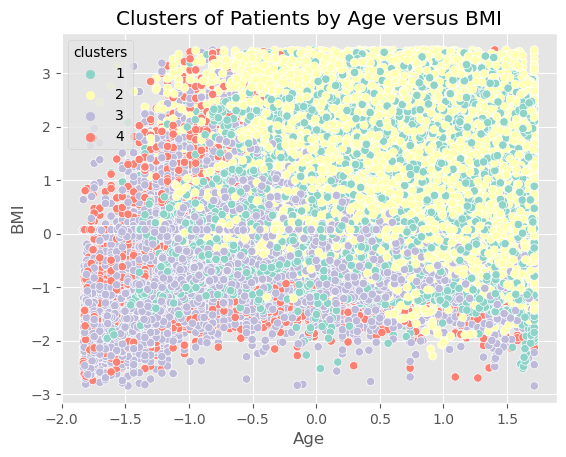

In [71]:
#pal is a predefined color palette with at least 4 colors
pal = sns.color_palette('Set3', 4)

# Plot clusters using scatterplot
sns.scatterplot(data=df_important_bisect, x='age', y='bmi', hue='clusters', palette=pal)
plt.title('Clusters of Patients by Age versus BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

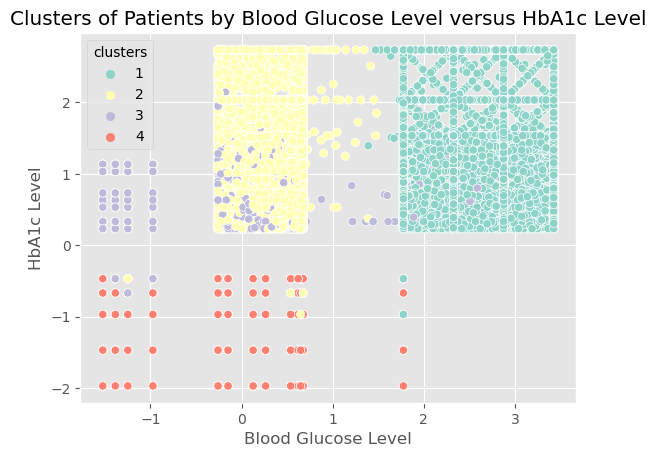

In [72]:
# pal is a predefined color palette with at least 4 colors
pal = sns.color_palette('Set3', 4)

# Plot clusters using scatterplot
sns.scatterplot(data=df_important_bisect, x='blood_glucose_level', y='HbA1c_level', hue='clusters', palette=pal)
plt.title('Clusters of Patients by Blood Glucose Level versus HbA1c Level')
plt.xlabel('Blood Glucose Level')
plt.ylabel('HbA1c Level')
plt.show()




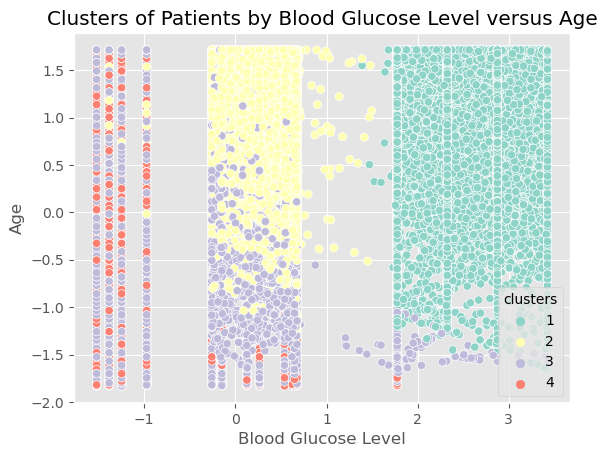

In [73]:
# pal is a predefined color palette with at least 4 colors
pal = sns.color_palette('Set3', 4)

# Plot clusters using scatterplot
sns.scatterplot(data=df_important_bisect, x='blood_glucose_level', y='age', hue='clusters', palette=pal)
plt.title('Clusters of Patients by Blood Glucose Level versus Age')
plt.xlabel('Blood Glucose Level')
plt.ylabel('Age')
plt.show()